In [1]:
import csv
import pandas
from vega import VegaLite

In [2]:
CSV_FILE = '../src/static/data/commodity_1789.csv'

In [3]:
fields = []

with open(CSV_FILE, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    fields = sorted(reader.fieldnames)
    print('nombre de lignes : ' , len(list(reader)), '\n\n')

print(', '.join(fields), '\n\n')
print('colonnes : ', len(fields))

nombre de lignes :  273 


cargo_item_action, cargo_item_action2, cargo_item_action3, cargo_item_action4, commodity_purpose, commodity_purpose2, commodity_purpose3, commodity_purpose4, departure_admiralty, departure_fr, destination_fr, homeport, tonnage, tonnage_class, tonnage_uncertainity 


colonnes :  15


In [4]:
data = pandas.read_csv(CSV_FILE)

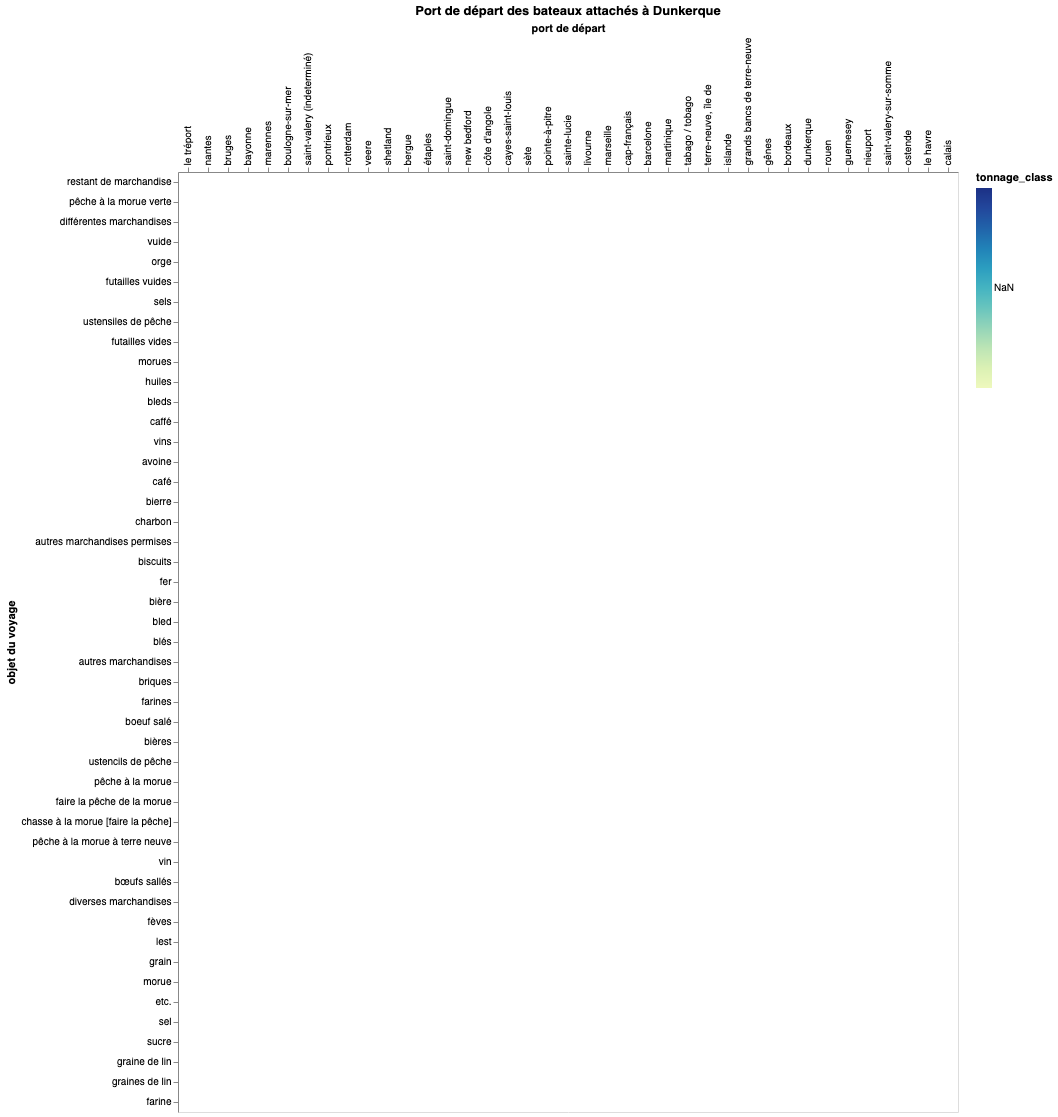

In [6]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "mark": "rect",
    "title": "Port de départ des bateaux attachés à Dunkerque",
  "encoding": {
    "x": {
      "field": "destination_fr",
      "type": "nominal",
        "sort": "-color",
      "axis": {
          "orient": "top"
      },
        "title": "port de départ"
    },
    "y": {
      "field": "commodity_purpose",
      "type": "nominal",
      "sort": "-color",
      "title": "objet du voyage"
    },
    "color": {
        "field": "tonnage_class",
        "aggregate": "nominal",
        "type": "quantitative"
    }
  },
    "transform": [
        {"filter": {"field": "cargo_item_action", "equal": "out"}}
],
}, data)

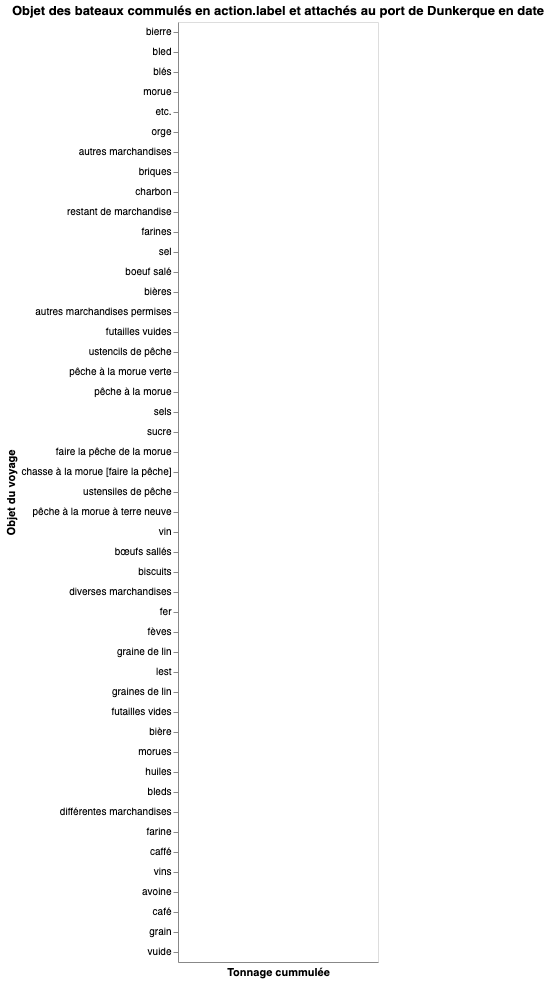

In [11]:
VegaLite({
        "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
        "title": "Objet des bateaux commulés en action.label et attachés au port de Dunkerque en date",
        "mark": "bar",
        "encoding": {
            "x": { "field": "flag", "type": "quantitative", "aggregate": "sum", "title": "Tonnage cummulée" },
            "y": { "field": "commodity_purpose", "type": "nominal", "sort": "-x", "title": "Objet du voyage" }
        },
        "transform": [
            { "filter": { "field": "cargo_item_action", "equal": "out" } }
        ],
    }, data)